In [2]:
!pip install inventorize3

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import inventorize3 as inv

In [4]:
retail = pd.read_csv('online_retail2.csv')
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
retail = retail.drop_duplicates().dropna(axis = 0)
retail = retail[retail['Quantity']>=0]

In [6]:
retail['Revenue'] = retail['Price'] * retail['Quantity']

In [7]:
grouped_df = retail.groupby(by = 'Description').agg(Quantity = ('Quantity', 'sum'), Revenue = ('Revenue', 'sum')).reset_index()

In [8]:
grouped_df.head()

,Description,Quantity,Revenue
0,DOORMAT UNION JACK GUNS AND ROSES,167,1071.25
1,3 STRIPEY MICE FELTCRAFT,662,1241.10
2,4 PURPLE FLOCK DINNER CANDLES,324,495.16
3,50'S CHRISTMAS GIFT BAG LARGE,1885,2272.25
4,ANIMAL STICKERS,385,80.85


In [9]:
a = inv.ABC(grouped_df[['Description', 'Quantity']])

In [10]:
a.head()

,Description,Quantity,Percentage,comulative,Category
5168,WORLD WAR 2 GLIDERS ASSTD DESIGNS,105185,0.009990,0.009990,A
5047,WHITE HANGING HEART T-LIGHT HOLDER,91757,0.008715,0.018705,A
3129,"PAPER CRAFT , LITTLE BIRDIE",80995,0.007693,0.026398,A
292,ASSORTED COLOUR BIRD ORNAMENT,78234,0.007431,0.033829,A
2695,MEDIUM CERAMIC TOP STORAGE JAR,77916,0.007400,0.041229,A


In [11]:
a['Category'].value_counts().sort_values(ascending = True)

Category
A    1157
B    1245
C    2881
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

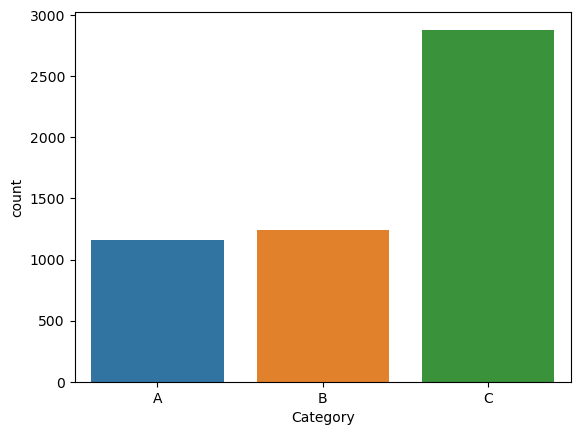

In [12]:
sns.countplot(data = a, x = a['Category'])

<Axes: xlabel='Category', ylabel='Quantity'>

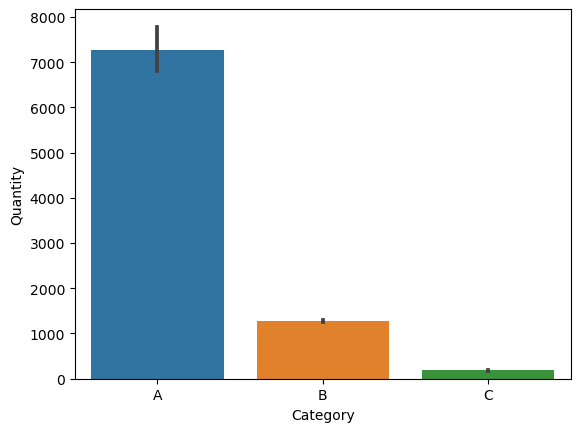

In [13]:
sns.barplot(data = a, x = a['Category'], y = a['Quantity'])

In [14]:
b = inv.productmix(grouped_df['Description'], grouped_df['Quantity'], grouped_df['Revenue'])
b.head()

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
3769,REGENCY CAKESTAND 3 TIER,24139,277656.25,0.002293,0.177816,0.015980,0.015980,A,A,A_A
5047,WHITE HANGING HEART T-LIGHT HOLDER,91757,247048.01,0.008715,0.018705,0.014219,0.030199,A,A,A_A
3129,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60,0.007693,0.026398,0.009696,0.039895,A,A,A_A
2860,Manual,9391,151777.67,0.000892,0.424068,0.008736,0.048631,A,A,A_A
2392,JUMBO BAG RED RETROSPOT,74224,134307.44,0.007050,0.048279,0.007730,0.056361,A,A,A_A


In [15]:
b['product_mix'].value_counts().sort_values(ascending = True)

product_mix
A_C      65
C_A      74
B_A     288
A_B     317
B_C     325
C_B     413
B_B     632
A_A     775
C_C    2394
Name: count, dtype: int64

<Axes: xlabel='product_mix', ylabel='count'>

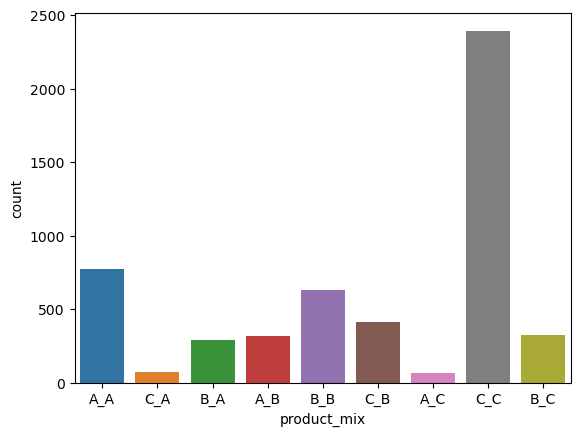

In [16]:
sns.countplot(data = b, x = b['product_mix'])

<Axes: xlabel='product_mix', ylabel='revenue'>

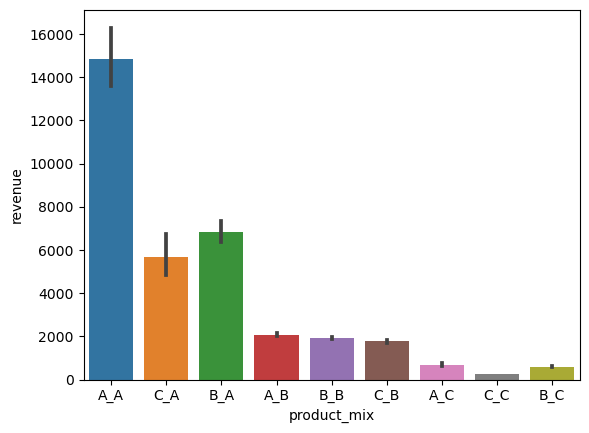

In [17]:
sns.barplot(data = b, x = b['product_mix'], y = b['revenue'])

In [18]:
retail_clean= pd.read_csv('retail_clean.csv')
by_store = retail_clean.groupby(by = ['Country', 'Description']).agg(total_sales = ('Quantity','sum'), total_revenue = ('Revenue','sum')).reset_index()

In [19]:
by_store

,Country,Description,total_sales,total_revenue
0,Australia,DOLLY GIRL BEAKER,200,216.00
1,Australia,I LOVE LONDON MINI BACKPACK,4,16.60
2,Australia,10 COLOUR SPACEBOY PEN,48,40.80
3,Australia,12 PENCIL SMALL TUBE WOODLAND,384,211.20
4,Australia,12 PENCILS SMALL TUBE RED SPOTTY,24,15.60
...,...,...,...,...
29444,West Indies,VINTAGE BEAD PINK SCARF,3,23.85
29445,West Indies,WHITE AND BLUE CERAMIC OIL BURNER,6,7.50
29446,West Indies,WOODLAND PARTY BAG + STICKER SET,1,1.65
29447,West Indies,WOVEN BERRIES CUSHION COVER,2,9.90


In [20]:
mix_country = inv.productmix_storelevel(by_store['Description'], by_store['total_sales'], by_store['total_revenue'], by_store['Country'])

C:\Users\thanh\anaconda3\Lib\site-packages\inventorize3\__init__.py:1102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['sales_mix']= store['sales']/sum(store['sales'])
C:\Users\thanh\anaconda3\Lib\site-packages\inventorize3\__init__.py:1102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['sales_mix']= store['sales']/sum(store['sales'])
C:\Users\thanh\anaconda3\Lib\site-packages\inventorize3\__init__.py:1102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [21]:
mix_country

,sku,sales,revenue,storeofsku,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
527,RABBIT NIGHT LIGHT,1884,3375.84,Australia,0.018104,0.047508,0.019942,0.019942,A,A,A_A
573,REGENCY CAKESTAND 3 TIER,266,2930.70,Australia,0.002556,0.507077,0.017312,0.037254,A,A,A_A
570,RED TOADSTOOL LED NIGHT LIGHT,1668,2464.20,Australia,0.016028,0.080141,0.014557,0.051811,A,A,A_A
180,DOLLY GIRL LUNCH BOX,1316,2182.20,Australia,0.012646,0.105932,0.012891,0.064702,A,A,A_A
671,SET OF 6 SPICE TINS PANTRY DESIGN,600,2082.00,Australia,0.005766,0.222097,0.012299,0.077001,A,A,A_A
...,...,...,...,...,...,...,...,...,...,...,...
29400,3 BLACK CATS W HEARTS BLANK CARD,13,2.47,West Indies,0.032911,0.458228,0.004605,0.991219,A,C,A_C
29439,SKULLS PARTY BAG + STICKER SET,1,1.65,West Indies,0.002532,0.987342,0.003076,0.994295,C,C,C_C
29446,WOODLAND PARTY BAG + STICKER SET,1,1.65,West Indies,0.002532,0.997468,0.003076,0.997371,C,C,C_C
29417,HAPPY BIRTHDAY CARD TEDDY/CAKE,4,0.76,West Indies,0.010127,0.893671,0.001417,0.998788,B,C,B_C


In [22]:
mix_country = mix_country.groupby(by = ['storeofsku', 'product_mix']).agg('count').reset_index()
mix_country

,storeofsku,product_mix,sku,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category
0,Australia,A_A,176,176,176,176,176,176,176,176,176
1,Australia,A_B,79,79,79,79,79,79,79,79,79
2,Australia,A_C,7,7,7,7,7,7,7,7,7
3,Australia,B_A,76,76,76,76,76,76,76,76,76
4,Australia,B_B,104,104,104,104,104,104,104,104,104
...,...,...,...,...,...,...,...,...,...,...,...
348,West Indies,B_B,4,4,4,4,4,4,4,4,4
349,West Indies,B_C,4,4,4,4,4,4,4,4,4
350,West Indies,C_A,6,6,6,6,6,6,6,6,6
351,West Indies,C_B,3,3,3,3,3,3,3,3,3


In [23]:
mix_country[['storeofsku', 'product_mix', 'sku']]

,storeofsku,product_mix,sku
0,Australia,A_A,176
1,Australia,A_B,79
2,Australia,A_C,7
3,Australia,B_A,76
4,Australia,B_B,104
...,...,...,...
348,West Indies,B_B,4
349,West Indies,B_C,4
350,West Indies,C_A,6
351,West Indies,C_B,3


In [24]:
mix_country[mix_country['storeofsku'] == 'Australia']

,storeofsku,product_mix,sku,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category
0,Australia,A_A,176,176,176,176,176,176,176,176,176
1,Australia,A_B,79,79,79,79,79,79,79,79,79
2,Australia,A_C,7,7,7,7,7,7,7,7,7
3,Australia,B_A,76,76,76,76,76,76,76,76,76
4,Australia,B_B,104,104,104,104,104,104,104,104,104
5,Australia,B_C,26,26,26,26,26,26,26,26,26
6,Australia,C_A,8,8,8,8,8,8,8,8,8
7,Australia,C_B,59,59,59,59,59,59,59,59,59
8,Australia,C_C,298,298,298,298,298,298,298,298,298


In [25]:
supplier = pd.read_csv('supplier_data.csv')

In [26]:
supplier.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596


In [27]:
supplier['risk_index'] = supplier['availability'] + supplier['no_suppliers'] + supplier['standard'] + supplier['price_fluctuation']

In [28]:
supplier.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price,risk_index
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360,1.0
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740,1.0
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919,1.0
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246,1.0
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596,0.5


In [29]:
supplier['value'] = supplier['Quantity'] * supplier['price']

In [30]:
supplier.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price,risk_index,value
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360,1.0,255600
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740,1.0,8211780
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919,1.0,11433723
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246,1.0,12422442
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596,0.5,13959672


In [31]:
def category(x, y):
    if (x >= 3000000) & (y >= 1):
        return 'strategic'
    if (x >= 3000000) & (y < 1):
        return 'leverage'
    if (x < 3000000) & (y >= 1):
        return 'routine'
    if (x < 3000000) & (y < 1):
        return 'critical'

In [32]:
for i in range(len(supplier)):
    supplier.loc[i, 'category'] = category(supplier.loc[i, 'value'], supplier.loc[i, 'risk_index'])

In [33]:
supplier.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price,risk_index,value,category
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360,1.0,255600,routine
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740,1.0,8211780,strategic
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919,1.0,11433723,strategic
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246,1.0,12422442,strategic
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596,0.5,13959672,leverage


In [34]:
supplier.category.value_counts()

category
routine      10
strategic     8
leverage      4
critical      2
Name: count, dtype: int64

<Axes: xlabel='value', ylabel='risk_index'>

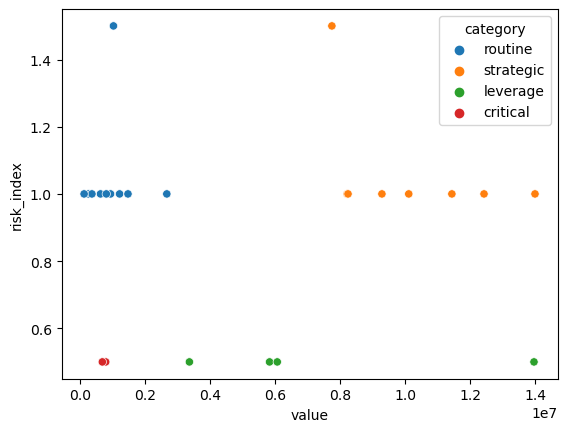

In [35]:
sns.scatterplot(data = supplier, x = 'value', y = 'risk_index', hue = 'category')